In [1]:
trim_dir='/home/user1/Desktop/comparison/EPTAWM3/trim/chains_42_yanjun/hd_pl/'
full_dir='/home/user1/Desktop/comparison/EPTAWM3/full/chains_42_yanjun/hd_pl/'

In [2]:
term='hd'

In [3]:
script_loc='/home/user1/Desktop/comparison/'
import sys, os
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_loc)
from diff_chain import  Diff_chain_shift

2023-04-16 04:53:10.360081: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 04:53:10.394372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 04:53:10.394974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 04:53:10.953114: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
par_trim=pd.read_csv(trim_dir+'GWB_PL_nf9_flinear9_25PSR_DE440_PTMCMC_parname.txt', header = None)
lt=len(par_trim)
par_trim

,0
0,Amp_gw
1,gamma_gw
2,Amp_red_J0030
3,gamma_red
4,Amp_dm_J0613
...,...
62,gamma_dm
63,Amp_dm_J2124
64,gamma_dm
65,Amp_red_J2322


In [5]:
trim_1=np.loadtxt(trim_dir+'chain_1.txt',usecols=(0,1,-4))

In [6]:
par_full=pd.read_csv(full_dir+'HM_CURN_GWB_corr2_fixgamma0_flinear9_25PSR_DE440_PTMCMC_parname.txt', header = None)
lf=len(par_full)
par_full

,0
0,Amp_gw
1,gamma_gw
2,Amp_red_J0030
3,gamma_red
4,Amp_red_J0613
...,...
70,Amp_dm_J2124
71,gamma_dm
72,Amp_red_J2322
73,gamma_red


In [7]:
full_1=np.loadtxt(full_dir+'chain_1.txt',usecols=(0,1,-4))

In [8]:
trim=trim_1.T[0:2];full=full_1.T[0:2]

In [9]:
names_red = ['logA_R','gamma_R']
labels_red=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [10]:
trim_red=MCSamples(samples=np.array(trim).transpose(),loglikes=trim_1.T[-1],names=names_red,labels=labels_red,label='TRIM')
full_red=MCSamples(samples=np.array(full).transpose(),loglikes=full_1.T[-1],names = names_red,labels=labels_red,label='FULL')


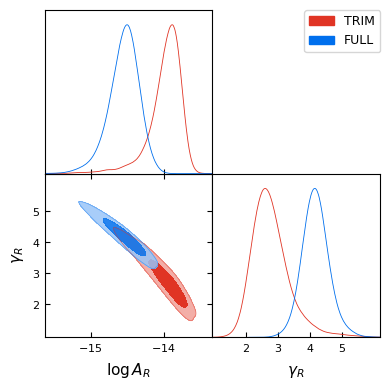

In [11]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([trim_red,full_red], filled=True)
plt.savefig('trimvsfull_'+term+'.png',dpi=300)
plt.show()

In [12]:
# %matplotlib inline
# diff_chain_red, nsig_red,sigl_red,sigu_red=Diff_chain_shift(trim_red,full_red)

# g = plots.get_subplot_plotter()
# #nsig=utilities.from_confidence_to_sigma(shift_probability)
# #getdist.plots.GetDistPlotSettings()
# g.triangle_plot(diff_chain_red, filled=True,legend_labels = ['$\Delta_T=$'+
#                         str("{:.5f}".format(nsig_red))],markers=[0,0,0,0])

# plt.savefig('diff_trimvsfull_'+term+'.png',dpi=300)

In [13]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig('f2_hd_tvsf'+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

(<getdist.mcsamples.MCSamples at 0x7f52658df970>, 0.8646047544624497)

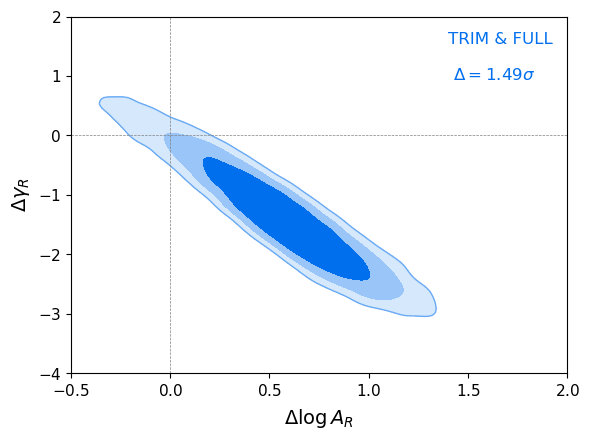

In [14]:
plot_diff_chain(trim_red,full_red,lims=[-0.5,2,-4,2])